# Chapter 

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# Make outputs show up to 4 decimals
np.set_printoptions(suppress=True, precision=4)

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz



## Visualizing matrices as images

Matrix A
[[ 1.5675 -0.2468  0.7986  0.4351]
 [ 1.437  -1.588   0.8861 -0.5835]
 [ 1.067   1.4507  1.4331  0.5497]]
Matrix C
[[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
 [-1  0 -1 -2 -3 -4 -5 -6 -7 -8]
 [-2 -1  0 -1 -2 -3 -4 -5 -6 -7]
 [-3 -2 -1  0 -1 -2 -3 -4 -5 -6]
 [-4 -3 -2 -1  0 -1 -2 -3 -4 -5]
 [-5 -4 -3 -2 -1  0 -1 -2 -3 -4]
 [-6 -5 -4 -3 -2 -1  0 -1 -2 -3]
 [-7 -6 -5 -4 -3 -2 -1  0 -1 -2]]


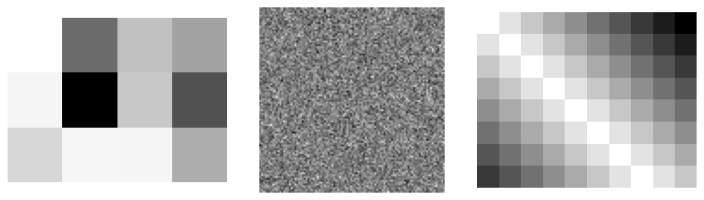

In [2]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

print('Matrix A')
print(A)

print('Matrix C')
print(C)


# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

## Slicing and extracting portions of a matrix

In [3]:
# Create a matrix with numbers from 0 to 60 and place them in a 6x10 matrix
A = np.arange(60).reshape(6,10)

# Grab rows: 1-3 (zero basd index) with a step of 1
# Grab columns 0 - 4 (zero based index) with a step of 1
sub = A[1:4:1,0:5:1]

# Grab rows: 1-3 (zero basd index) with a step of 2
# Grab columns 0 - 4 (zero based index) with a step of 2
sub_2 = A[1:4:2,0:5:2]

In [4]:
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [5]:
sub

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [6]:
sub_2

array([[10, 12, 14],
       [30, 32, 34]])

## Special matrices

### Random number matrix

You can choose your distribution

In [7]:
# Gaussian
Mrows = 3 # shape 0
Ncols = 3 # shape 1
A = np.random.randn(Mrows,Ncols)
A


array([[-0.1258, -1.1297,  0.2926],
       [ 0.0775, -0.5093,  1.2994],
       [ 1.3168, -0.6861,  2.8793]])

### Diagonal

In [8]:
# WHen passing a matrix returns the diagonal values as a vector
np.diag(A)

array([-0.1258, -0.5093,  2.8793])

In [9]:
# When inputting a vector will return a matrix with those values in the diagonal
vector = np.array([ 0.071 ,  0.8252, -0.8606])
np.diag(vector)

array([[ 0.071 ,  0.    ,  0.    ],
       [ 0.    ,  0.8252,  0.    ],
       [ 0.    ,  0.    , -0.8606]])

### Triangular

In [10]:
# Triangular upper
np.triu(A)

array([[-0.1258, -1.1297,  0.2926],
       [ 0.    , -0.5093,  1.2994],
       [ 0.    ,  0.    ,  2.8793]])

In [11]:
# Triangular lower
np.tril(A)

array([[-0.1258,  0.    ,  0.    ],
       [ 0.0775, -0.5093,  0.    ],
       [ 1.3168, -0.6861,  2.8793]])

### Identity

In [12]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Zeros

In [13]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## Operations

In [14]:
A = np.array([[2, 3, 4],
              [1, 2, 4]])

B = np.array([[0, 3, 1],
              [-1, -4, 2]])

print(A)
print('')
print(B)

[[2 3 4]
 [1 2 4]]

[[ 0  3  1]
 [-1 -4  2]]


### Addition and substraction

In [15]:
# Addition and substraction are simply element wise 
A + B

array([[ 2,  6,  5],
       [ 0, -2,  6]])

### Shifting a matrix 

As with vectors, it is not formally possible to add a scalar to a matrix, as in λ+A.
 Python allows such an operation (e.g., 3+np.eye(2)), which involves broadcast
adding the scalar to each element of the matrix. That is a convenient computation,
 but it is not formally a linear algebra operation.
 
 But there is a linear-algebra way to add a scalar to a square matrix, and that is
 called shifting a matrix. It works by adding a constant value to the diagonal, which is
 implemented by adding a scalar multiplied identity matrix:


In [16]:
A = np.array([ [4,5,1],[0,1,11],[4,9,7] ])

A

array([[ 4,  5,  1],
       [ 0,  1, 11],
       [ 4,  9,  7]])

In [17]:
s = 6
A + s # NOT shifting!

array([[10, 11,  7],
       [ 6,  7, 17],
       [10, 15, 13]])

 “Shifting” a matrix has two primary (extremely important!) applications: it is the
 mechanism of finding the eigenvalues of a matrix, and it is the mechanism of regula
rizing matrices when fitting models to data.

In [18]:
A + s*np.eye(len(A)) # shifting: only the diagonl elements change

array([[10.,  5.,  1.],
       [ 0.,  7., 11.],
       [ 4.,  9., 13.]])

### Hardman multiplication 

Multiply each corresponding element



In [19]:
A = np.array([[2, 3, 4],
              [1, 2, 4],
              [9, 8, 7]])

B = np.array([[0, 3, 1],
              [-1, -4, 2],
              [3, 2, 1]])

In [20]:
A*B

array([[ 0,  9,  4],
       [-1, -8,  8],
       [27, 16,  7]])

### Standard matrix multiplication (P83)

In [21]:
# We use @ symbol 
A@B

array([[ 9,  2, 12],
       [10,  3,  9],
       [13,  9, 32]])

### Matrix vector multiplication (P86)

**Geometric transformations**

In [23]:
M  = np.array([ [2,3],[2,1] ])
x  = np.array([ [1,1.5] ]).T
Mx = M@x

In [24]:
print(M)
print('')
print(x)

[[2 3]
 [2 1]]

[[1. ]
 [1.5]]


The matrix transformation stretched and rotated vector x

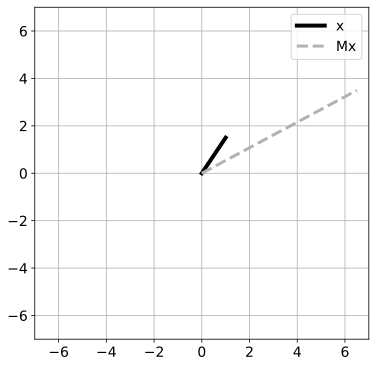

In [25]:
plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]],[0,x[1,0]],'k',linewidth=4,label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()

The matrix DID NOT rotate vector v, it only stretched it. 

v is an eigenvector of this matrix!

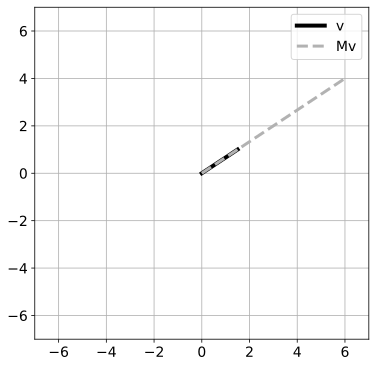

In [26]:
v  = np.array([ [1.5,1] ]).T # transposed into a column vector!
Mv = M@v


plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05b.png',dpi=300)
plt.show()